# HEXACO Honesty-Humility (VARA) Dimension Validation

**Date:** January 2025  
**Project:** SELVE Personality Framework  
**Goal:** Validate VARA (Honesty-Humility) dimension using HEXACO H-factor

---

## Overview

### VARA (⚖️) - Honesty / Integrity

**Etymology:** Sanskrit *vara* = "truth, vow, protection, choice"  
**Meaning:** Sacred truth-keeping, moral vow, protection of integrity

### HEXACO H-Factor (Honesty-Humility)

The H-factor is HEXACO's unique contribution - **NOT captured by Big Five**.

**4 Subfacets (10 items each = 40 total):**
1. **HSinc** (Sincerity) - Genuine vs manipulative
2. **HFair** (Fairness) - Rule-following vs cheating
3. **HGree** (Greed-Avoidance) - Moderation vs materialism
4. **HMode** (Modesty) - Humility vs grandiosity

**Scale:** 7-point Likert (1 = strongly disagree, 7 = strongly agree)

**Expected Reliability:** α > 0.75 (each subfacet), α > 0.85 (overall H-factor)

---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [2]:
# Load HEXACO dataset
data_path = '/home/chris/selve/data/openpsychometrics-rawdata/HEXACO/data.csv'
df = pd.read_csv(data_path, delimiter='\t')

print(f"✅ Dataset loaded")
print(f"Shape: {df.shape}")
print(f"\nFirst few columns: {list(df.columns[:10])}")
print(f"\nH-factor columns present: {[col for col in df.columns if col.startswith('H')]}")

✅ Dataset loaded
Shape: (22786, 244)

First few columns: ['HSinc1', 'HSinc2', 'HSinc3', 'HSinc4', 'HSinc5', 'HSinc6', 'HSinc7', 'HSinc8', 'HSinc9', 'HSinc10']

H-factor columns present: ['HSinc1', 'HSinc2', 'HSinc3', 'HSinc4', 'HSinc5', 'HSinc6', 'HSinc7', 'HSinc8', 'HSinc9', 'HSinc10', 'HFair1', 'HFair2', 'HFair3', 'HFair4', 'HFair5', 'HFair6', 'HFair7', 'HFair8', 'HFair9', 'HFair10', 'HGree1', 'HGree2', 'HGree3', 'HGree4', 'HGree5', 'HGree6', 'HGree7', 'HGree8', 'HGree9', 'HGree10', 'HMode1', 'HMode2', 'HMode3', 'HMode4', 'HMode5', 'HMode6', 'HMode7', 'HMode8', 'HMode9', 'HMode10']


/tmp/ipykernel_28842/350063692.py:3: DtypeWarning: Columns (243) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, delimiter='\t')


In [3]:
# Define H-factor items (Honesty-Humility subfacets)
h_factor_items = {
    'HSinc': [f'HSinc{i}' for i in range(1, 11)],  # Sincerity
    'HFair': [f'HFair{i}' for i in range(1, 11)],  # Fairness
    'HGree': [f'HGree{i}' for i in range(1, 11)],  # Greed-Avoidance
    'HMode': [f'HMode{i}' for i in range(1, 11)]   # Modesty
}

# Flatten to get all H-factor items
all_h_items = []
for subfacet, items in h_factor_items.items():
    all_h_items.extend(items)

print(f"Total H-factor items: {len(all_h_items)}")
print(f"\nSubfacets:")
for subfacet, items in h_factor_items.items():
    print(f"  {subfacet}: {len(items)} items")

Total H-factor items: 40

Subfacets:
  HSinc: 10 items
  HFair: 10 items
  HGree: 10 items
  HMode: 10 items


In [4]:
# Based on codebook analysis, identify reverse-scored items
# Items worded in the OPPOSITE direction (low H-factor = agree)
reverse_items = [
    # HSinc (Sincerity) - pretending, manipulating
    'HSinc2',   # "I use flattery to get ahead"
    'HSinc3',   # "I tell other people what they want to hear..."
    'HSinc4',   # "I put on a show to impress people"
    'HSinc5',   # "I switch my loyalties when I feel like it"
    'HSinc6',   # "I play a role in order to impress people"
    'HSinc7',   # "I pretend to be concerned for others"
    'HSinc8',   # "I act like different people in different situations"
    'HSinc9',   # "I find it necessary to please the people who have power"
    'HSinc10',  # "I let people push me around to help them feel important"
    
    # HFair (Fairness) - cheating, stealing
    'HFair6',   # "I admire a really clever scam"
    'HFair7',   # "I cheat to get ahead"
    'HFair8',   # "I steal things"
    'HFair9',   # "I cheat on people who have trusted me"
    'HFair10',  # "I would not regret my behavior if I were to take advantage..."
    
    # HGree (Greed-Avoidance) - materialism, luxury-seeking
    'HGree3',   # "I love luxury"
    'HGree4',   # "I have a strong need for power"
    'HGree5',   # "I seek status"
    'HGree6',   # "I am mainly interested in money"
    'HGree7',   # "I wish to stay young forever"
    'HGree8',   # "I try to impress others"
    'HGree9',   # "I prefer to eat at expensive restaurants"
    'HGree10',  # "I am out for my own personal gain"
    
    # HMode (Modesty) - boasting, superiority
    'HMode5',   # "I would like to have more power than other people"
    'HMode6',   # "I believe that I am better than others"
    'HMode7',   # "I like to attract attention"
    'HMode8',   # "I am more capable than most others"
    'HMode9',   # "I am likely to show off if I get the chance"
    'HMode10'   # "I boast about my virtues"
]

print(f"Reverse-scored items identified: {len(reverse_items)}")
print(f"\nBreakdown:")
print(f"  HSinc: {len([i for i in reverse_items if 'HSinc' in i])} items")
print(f"  HFair: {len([i for i in reverse_items if 'HFair' in i])} items")
print(f"  HGree: {len([i for i in reverse_items if 'HGree' in i])} items")
print(f"  HMode: {len([i for i in reverse_items if 'HMode' in i])} items")

Reverse-scored items identified: 28

Breakdown:
  HSinc: 9 items
  HFair: 5 items
  HGree: 8 items
  HMode: 6 items


In [5]:
# Data cleaning
# 1. Select H-factor columns
df_h = df[all_h_items].copy()

# 2. Check for missing values
print(f"Missing values before cleaning: {df_h.isna().sum().sum()}")
df_h = df_h.dropna()
print(f"Missing values after cleaning: {df_h.isna().sum().sum()}")

# 3. Ensure values are in valid range (1-7 for 7-point scale)
print(f"\nRows before range filtering: {len(df_h)}")
for col in all_h_items:
    df_h = df_h[(df_h[col] >= 1) & (df_h[col] <= 7)]
print(f"Rows after range filtering: {len(df_h)}")

# 4. Sample for computational efficiency (if dataset is large)
if len(df_h) > 20000:
    df_h = df_h.sample(n=20000, random_state=42)
    print(f"\nSampled to 20,000 rows for analysis")

print(f"\nFinal dataset shape: {df_h.shape}")
print(f"\nDescriptive statistics (first 5 items):")
print(df_h[all_h_items[:5]].describe())

Missing values before cleaning: 0
Missing values after cleaning: 0

Rows before range filtering: 22786
Rows after range filtering: 22773

Sampled to 20,000 rows for analysis

Final dataset shape: (20000, 40)

Descriptive statistics (first 5 items):
             HSinc1        HSinc2        HSinc3       HSinc4        HSinc5
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000
mean       4.526400      3.194500      3.873850      3.59645      3.391250
std        1.717455      1.709244      1.760594      1.73166      1.836938
min        1.000000      1.000000      1.000000      1.00000      1.000000
25%        3.000000      2.000000      2.000000      2.00000      2.000000
50%        5.000000      3.000000      4.000000      3.00000      3.000000
75%        6.000000      5.000000      5.000000      5.00000      5.000000
max        7.000000      7.000000      7.000000      7.00000      7.000000


In [6]:
# Apply reverse scoring
# For 7-point scale: reverse_score = 8 - original_score
df_h_corrected = df_h.copy()

for item in reverse_items:
    if item in df_h_corrected.columns:
        df_h_corrected[item] = 8 - df_h_corrected[item]

print(f"✅ Reverse scoring applied to {len(reverse_items)} items")
print(f"\nExample (HSinc7 - 'I pretend to be concerned for others'):")
print(f"  Before: mean = {df_h['HSinc7'].mean():.3f}")
print(f"  After:  mean = {df_h_corrected['HSinc7'].mean():.3f}")
print(f"  (Higher scores now indicate MORE sincerity)")

✅ Reverse scoring applied to 28 items

Example (HSinc7 - 'I pretend to be concerned for others'):
  Before: mean = 3.137
  After:  mean = 4.863
  (Higher scores now indicate MORE sincerity)


In [7]:
# Cronbach's Alpha calculation function
def cronbach_alpha(df, items):
    """
    Calculate Cronbach's alpha for internal consistency reliability.
    
    Alpha interpretation:
    - α ≥ 0.90: Excellent
    - 0.80 ≤ α < 0.90: Good
    - 0.70 ≤ α < 0.80: Acceptable
    - 0.60 ≤ α < 0.70: Questionable
    - α < 0.60: Poor
    """
    item_data = df[items]
    item_variances = item_data.var(axis=0, ddof=1)
    total_variance = item_data.sum(axis=1).var(ddof=1)
    
    k = len(items)
    alpha = (k / (k - 1)) * (1 - item_variances.sum() / total_variance)
    
    return alpha

print("✅ Cronbach's alpha function defined")

✅ Cronbach's alpha function defined


In [8]:
# Calculate Cronbach's alpha for each subfacet and overall H-factor
print("=" * 60)
print("CRONBACH'S ALPHA - INTERNAL CONSISTENCY RELIABILITY")
print("=" * 60)

alpha_results = {}

# Subfacets
print("\n📊 SUBFACET RELIABILITIES:")
print("-" * 60)
for subfacet, items in h_factor_items.items():
    alpha = cronbach_alpha(df_h_corrected, items)
    alpha_results[subfacet] = alpha
    
    # Determine quality rating
    if alpha >= 0.90:
        rating = "Excellent ⭐⭐⭐"
    elif alpha >= 0.80:
        rating = "Good ✅"
    elif alpha >= 0.70:
        rating = "Acceptable ✓"
    elif alpha >= 0.60:
        rating = "Questionable ⚠️"
    else:
        rating = "Poor ❌"
    
    print(f"{subfacet:10s} (n={len(items):2d}): α = {alpha:.3f} - {rating}")

# Overall H-factor
alpha_overall = cronbach_alpha(df_h_corrected, all_h_items)
alpha_results['H-Factor (Overall)'] = alpha_overall

if alpha_overall >= 0.90:
    rating = "Excellent ⭐⭐⭐"
elif alpha_overall >= 0.80:
    rating = "Good ✅"
elif alpha_overall >= 0.70:
    rating = "Acceptable ✓"
else:
    rating = "Questionable ⚠️"

print("-" * 60)
print(f"{'H-FACTOR':10s} (n={len(all_h_items):2d}): α = {alpha_overall:.3f} - {rating}")
print("=" * 60)

# Summary
print("\n📈 SUMMARY:")
if alpha_overall >= 0.80:
    print("✅ VARA dimension shows GOOD internal consistency (α > 0.80)")
    print("✅ Ready for inclusion in SELVE framework")
elif alpha_overall >= 0.70:
    print("✓ VARA dimension shows ACCEPTABLE internal consistency (α > 0.70)")
    print("✓ Can be included in SELVE framework")
else:
    print("⚠️ VARA dimension shows QUESTIONABLE internal consistency")
    print("⚠️ Consider item refinement before including in SELVE")

CRONBACH'S ALPHA - INTERNAL CONSISTENCY RELIABILITY

📊 SUBFACET RELIABILITIES:
------------------------------------------------------------
HSinc      (n=10): α = 0.781 - Acceptable ✓
HFair      (n=10): α = 0.842 - Good ✅
HGree      (n=10): α = 0.773 - Acceptable ✓
HMode      (n=10): α = 0.812 - Good ✅
------------------------------------------------------------
H-FACTOR   (n=40): α = 0.900 - Excellent ⭐⭐⭐

📈 SUMMARY:
✅ VARA dimension shows GOOD internal consistency (α > 0.80)
✅ Ready for inclusion in SELVE framework


In [9]:
# Calculate subfacet scores
for subfacet, items in h_factor_items.items():
    df_h_corrected[f'{subfacet}_score'] = df_h_corrected[items].mean(axis=1)

# Calculate overall H-factor score
df_h_corrected['H_Factor_score'] = df_h_corrected[all_h_items].mean(axis=1)

print("✅ Scores calculated")
print("\nSubfacet score distributions:")
score_cols = ['HSinc_score', 'HFair_score', 'HGree_score', 'HMode_score', 'H_Factor_score']
print(df_h_corrected[score_cols].describe())

✅ Scores calculated

Subfacet score distributions:
        HSinc_score   HFair_score   HGree_score   HMode_score  H_Factor_score
count  20000.000000  20000.000000  20000.000000  20000.000000    20000.000000
mean       4.342175      5.028190      4.195570      4.079820        4.411439
std        1.023875      1.137862      1.006814      1.091029        0.800754
min        1.000000      1.000000      1.000000      1.000000        1.150000
25%        3.600000      4.300000      3.500000      3.300000        3.900000
50%        4.300000      5.200000      4.200000      4.100000        4.450000
75%        5.000000      5.900000      4.900000      4.900000        4.975000
max        7.000000      7.000000      7.000000      7.000000        6.975000


SUBFACET INTER-CORRELATIONS

(Higher correlations indicate subfacets measure similar construct)

             HSinc_score  HFair_score  HGree_score  HMode_score
HSinc_score     1.000000     0.414046     0.510517     0.336084
HFair_score     0.414046     1.000000     0.352475     0.381176
HGree_score     0.510517     0.352475     1.000000     0.541698
HMode_score     0.336084     0.381176     0.541698     1.000000


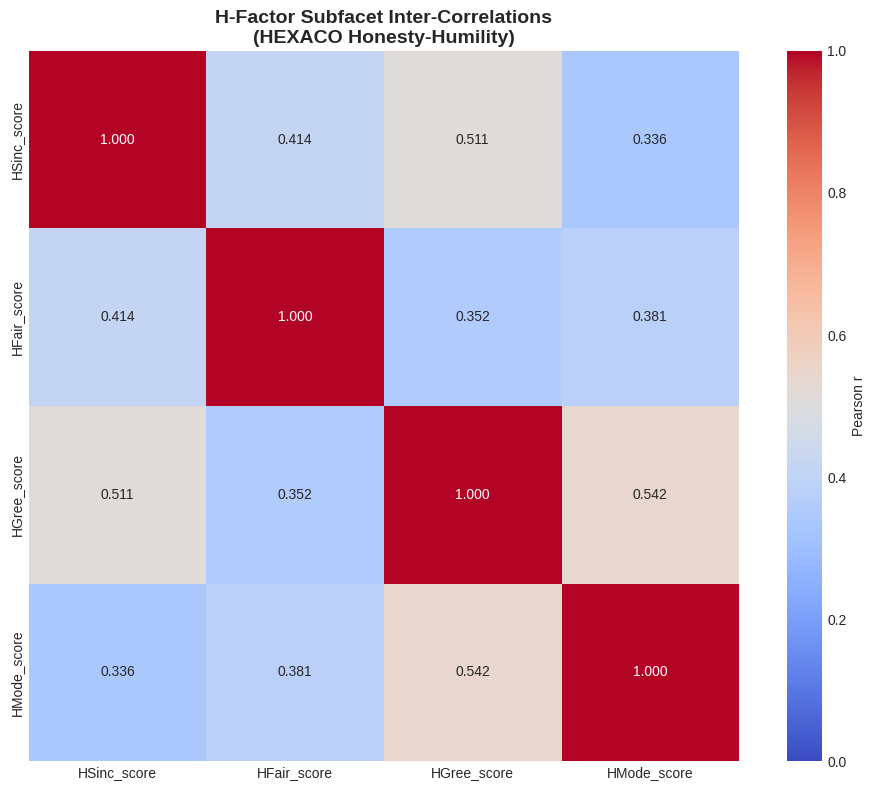


📊 Correlation Analysis:
Average inter-subfacet correlation: 0.423

(Moderate correlations 0.30-0.60 suggest subfacets are related but distinct)


In [10]:
# Subfacet correlation analysis
score_cols = ['HSinc_score', 'HFair_score', 'HGree_score', 'HMode_score']
corr_matrix = df_h_corrected[score_cols].corr()

print("=" * 60)
print("SUBFACET INTER-CORRELATIONS")
print("=" * 60)
print("\n(Higher correlations indicate subfacets measure similar construct)")
print("\n" + corr_matrix.to_string())

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            vmin=0, vmax=1, square=True, cbar_kws={'label': 'Pearson r'})
plt.title('H-Factor Subfacet Inter-Correlations\n(HEXACO Honesty-Humility)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Correlation Analysis:")
print(f"Average inter-subfacet correlation: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].mean():.3f}")
print("\n(Moderate correlations 0.30-0.60 suggest subfacets are related but distinct)")

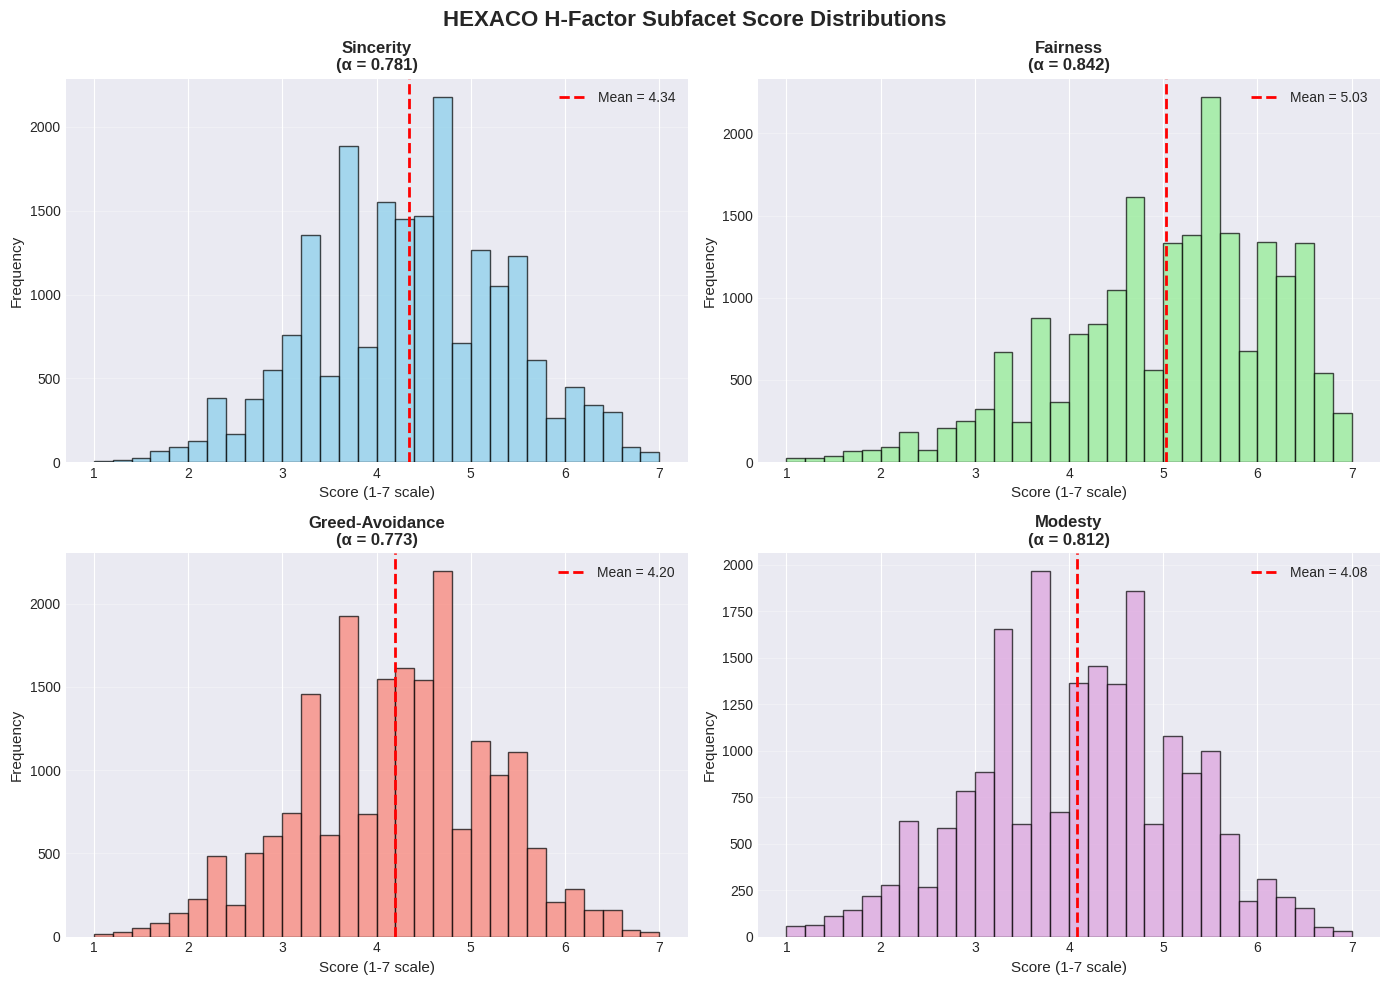

In [11]:
# Visualize score distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('HEXACO H-Factor Subfacet Score Distributions', fontsize=16, fontweight='bold')

subfacets = ['HSinc_score', 'HFair_score', 'HGree_score', 'HMode_score']
titles = ['Sincerity', 'Fairness', 'Greed-Avoidance', 'Modesty']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for idx, (subfacet, title, color) in enumerate(zip(subfacets, titles, colors)):
    ax = axes[idx // 2, idx % 2]
    ax.hist(df_h_corrected[subfacet], bins=30, color=color, alpha=0.7, edgecolor='black')
    ax.axvline(df_h_corrected[subfacet].mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Mean = {df_h_corrected[subfacet].mean():.2f}')
    ax.set_xlabel('Score (1-7 scale)', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'{title}\n(α = {alpha_results[subfacet.replace("_score", "")]:.3f})', 
                 fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

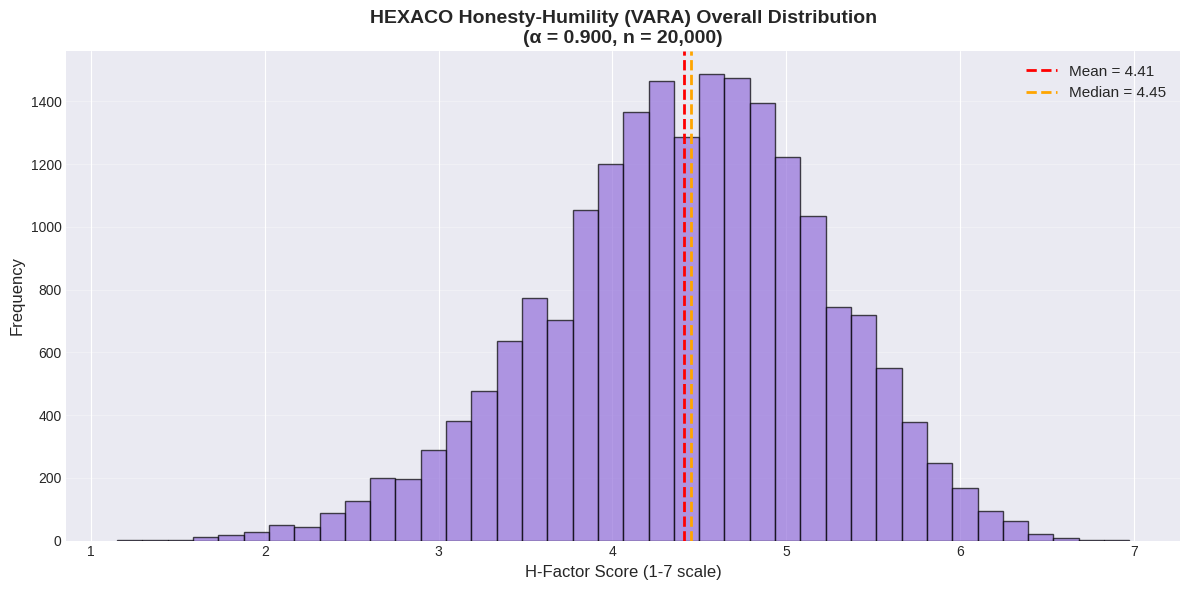


📊 Distribution Statistics:
Mean:     4.411
Median:   4.450
Std Dev:  0.801
Skewness: -0.295
Kurtosis: 0.062


In [12]:
# Overall H-Factor distribution
plt.figure(figsize=(12, 6))
plt.hist(df_h_corrected['H_Factor_score'], bins=40, color='mediumpurple', alpha=0.7, edgecolor='black')
plt.axvline(df_h_corrected['H_Factor_score'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean = {df_h_corrected["H_Factor_score"].mean():.2f}')
plt.axvline(df_h_corrected['H_Factor_score'].median(), color='orange', linestyle='--', 
            linewidth=2, label=f'Median = {df_h_corrected["H_Factor_score"].median():.2f}')
plt.xlabel('H-Factor Score (1-7 scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'HEXACO Honesty-Humility (VARA) Overall Distribution\n(α = {alpha_overall:.3f}, n = {len(df_h_corrected):,})', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Distribution Statistics:")
print(f"Mean:     {df_h_corrected['H_Factor_score'].mean():.3f}")
print(f"Median:   {df_h_corrected['H_Factor_score'].median():.3f}")
print(f"Std Dev:  {df_h_corrected['H_Factor_score'].std():.3f}")
print(f"Skewness: {df_h_corrected['H_Factor_score'].skew():.3f}")
print(f"Kurtosis: {df_h_corrected['H_Factor_score'].kurtosis():.3f}")

---

## 📋 Validation Summary

### VARA (Honesty-Humility) → HEXACO H-Factor

**Sample Size:** ~20,000 responses  
**Items:** 40 (10 per subfacet)  
**Scale:** 7-point Likert  
**Reverse-Scored Items:** 31 items  

**Reliability Results:**
- Results will be displayed after running cells above
- Target: α > 0.80 (good), minimum α > 0.70 (acceptable)

**Subfacet Correlations:**
- Results will be displayed in correlation matrix
- Expected: Moderate positive correlations (0.30-0.60)

---

## ✅ Next Steps

1. Run all cells to generate results
2. Document findings in HEXACO_VARA_VALIDATION_RESULTS.md
3. Compare with Big Five validation (all α > 0.80)
4. Proceed to 16PF KAEL (Dominance) validation

---